<a href="https://colab.research.google.com/github/ghazal-najafi/Face-clustering-/blob/main/Face_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **import the libraries**

In [ ]:
!pip install arcface
!pip install mtcnn
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
from arcface import ArcFace
import cv2
from tensorflow.keras.preprocessing import image
from skimage import transform as trans
from PIL import Image
from numpy import asarray
from matplotlib.patches import Rectangle
from imutils import paths
import os
# import face_recognition
import pandas as pd
import numpy as np
from mtcnn.mtcnn import MTCNN
import logging

import tensorflow as tf
tf.get_logger().setLevel(logging.ERROR)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from torchvision.transforms import ToTensor
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm.notebook import tqdm
from PIL import Image


     |████████████████████████████████| 62 kB 865 kB/s 
     |████████████████████████████████| 49.9 MB 16 kB/s 
     |████████████████████████████████| 636 kB 60.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have

## **Unzip data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/Dataset/Dataset3.zip'

!unzip '/content/gdrive/MyDrive/Dataset/Dataset3.zip'

!ls '/content/gdrive/MyDrive/Dataset/Dataset3.zip'

Archive:  /content/gdrive/MyDrive/Dataset/Dataset3.zip
   creating: Dataset3/
  inflating: Dataset3/saeid-marouf5.jpeg  
  inflating: Dataset3/Azadeh-Samadi3.jpeg  
  inflating: Dataset3/Azadeh-Samadi5.jpg  
  inflating: Dataset3/amin-hayai5.jpg  
  inflating: Dataset3/saeid-marouf3.jpeg  
  inflating: Dataset3/Mohammad_Mousavi1.jpg  
  inflating: Dataset3/Azadeh-Samadi1.jpg  
  inflating: Dataset3/Azadeh-Samadi4.jpg  
  inflating: Dataset3/amin-hayai1.jpeg  
  inflating: Dataset3/saeid-marouf1.jpg  
  inflating: Dataset3/amin-hayai2.jpeg  
  inflating: Dataset3/Azadeh-Samadi2.jpg  
  inflating: Dataset3/amin-hayai3.jpg  
  inflating: Dataset3/saeid-marouf4.jpg  
  inflating: Dataset3/amin-hayai4.jpg  
  inflating: Dataset3/saeid-marouf2.jpeg  
  inflating: Dataset3/Mohammad_Mousavi2.jpeg  
  inflating: Dataset3/Mohammad_Mousavi3.jpeg  
  inflating: Dataset3/Mohammad_Mousavi4.jpg  
  inflating: Dataset3/Mohammad_Mousavi5.jpeg  
  inflating: Dataset3/Anil_Kapoor1.jpg  
  inflating: Data

In [ ]:
# path = '/content/gdrive/MyDrive/Dataset/Dataset.zip'

# !unzip '/content/gdrive/MyDrive/Dataset/Dataset.zip'

# !ls '/content/gdrive/MyDrive/Dataset/Dataset.zip'

In [ ]:
# path2 = '/content/gdrive/MyDrive/Dataset/Dataset2.zip'

# !unzip '/content/gdrive/MyDrive/Dataset/Dataset2.zip'

# !ls '/content/gdrive/MyDrive/Dataset/Dataset2.zip'

In [ ]:
# path3 = '/content/gdrive/MyDrive/Dataset/test.zip'

# !unzip '/content/gdrive/MyDrive/Dataset/test.zip'

# !ls '/content/gdrive/MyDrive/Dataset/test.zip'

In [ ]:
path4 = '/content/gdrive/MyDrive/Dataset/data.zip'

!unzip '/content/gdrive/MyDrive/Dataset/data.zip'

!ls '/content/gdrive/MyDrive/Dataset/data.zip'

Archive:  /content/gdrive/MyDrive/Dataset/data.zip
   creating: data/
  inflating: data/__init__.py        
  inflating: data/haarcascade_eye.xml  
  inflating: data/haarcascade_eye_tree_eyeglasses.xml  
  inflating: data/haarcascade_frontalcatface.xml  
  inflating: data/haarcascade_frontalcatface_extended.xml  
  inflating: data/haarcascade_frontalface_alt.xml  
  inflating: data/haarcascade_frontalface_alt2.xml  
  inflating: data/haarcascade_frontalface_alt_tree.xml  
  inflating: data/haarcascade_frontalface_default.xml  
  inflating: data/haarcascade_fullbody.xml  
  inflating: data/haarcascade_lefteye_2splits.xml  
  inflating: data/haarcascade_licence_plate_rus_16stages.xml  
  inflating: data/haarcascade_lowerbody.xml  
  inflating: data/haarcascade_profileface.xml  
  inflating: data/haarcascade_righteye_2splits.xml  
  inflating: data/haarcascade_russian_plate_number.xml  
  inflating: data/haarcascade_smile.xml  
  inflating: data/haarcascade_upperbody.xml  
  inflating: da

## **Face Detection**

In [ ]:
import dlib
from imutils import face_utils, paths
# face detection with HaarCascade on a photograph

facecascade = cv2.CascadeClassifier('/content/data/haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier('/content/data/haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier('/content/data/haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('/content/data/haarcascade_smile.xml')

def HaarCascadeAlgorithm(imagePath):
    
    # Read the image
    image = cv2.imread(imagePath)
    
    # Show the image
    fig, axs = plt.subplots(1, 2,figsize=(10, 10))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    axs[0].axis('off')
    
    # Detect faces in the image
    faces = facecascade.detectMultiScale(image, scaleFactor=1.5, minNeighbors=5)
    
    # Detect faces
    faces = facecascade.detectMultiScale(image,scaleFactor=1.1,minNeighbors=5,flags=cv2.CASCADE_SCALE_IMAGE)
    
    # For each face
    for (x, y, w, h) in faces: 
        # Draw rectangle around the face
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 255), 3)  
        
    axs[1].axis('off')
    axs[1].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    plt.show()


# face detection with HOG on a photograph

def HOGAlgorithm(imagePath):
    # Read the image
    image = cv2.imread(imagePath)
    
    # Show the image
    fig, axs = plt.subplots(1, 2,figsize=(10, 10))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    axs[0].axis('off')
    
    # Calculate gradient 
    gx = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    
    face_detect = dlib.get_frontal_face_detector()
    rects = face_detect(image, 1)
    
    for (i, rect) in enumerate(rects):
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 255), 3)

 
    axs[1].axis('off')
    axs[1].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    plt.show() 
    



# # face detection with dlib on a photograph
# # use pre-trained model
# cnnFaceDetector = dlib.cnn_face_detection_model_v1('/content/data/mmod_human_face_detector.dat')

# # draw an image with detected objects
# def dlibCNNAlgorithm(imagePath):
   
#     # Read the image
#     image = cv2.imread(imagePath)
    
#     # Show the image
#     fig, axs = plt.subplots(1, 2,figsize=(10, 10))
#     axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
#     axs[0].axis('off')
    
#     faces = cnnFaceDetector(image, 1)

#     for (i, rect) in enumerate(faces):
#       x1 = rect.rect.left()
#       y1 = rect.rect.top()
#       x2 = rect.rect.right()
#       y2 = rect.rect.bottom()
        
#       # Draw rectangle around the face
#       cv2.rectangle(image, (x1, y1), (x2, y2), (255, 255, 255), 3)

#     axs[1].axis('off')
#     axs[1].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
#     plt.show()



# face detection with mtcnn on a photograph
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):

    # load the image
    data = cv2.imread(filename)
    # plot the image
    fig, axs = plt.subplots(1, 2,figsize=(10, 10))
    axs[0].imshow(cv2.cvtColor(data, cv2.COLOR_RGB2BGR))
    axs[0].axis('off')
    
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='white')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
            # show the plot
            
    axs[1].axis('off')
    axs[1].imshow(cv2.cvtColor(data, cv2.COLOR_RGB2BGR))
    plt.show()
                   
def MTCNNAlgorithm(imagePath):
    pixels = plt.imread(imagePath,0)
    detector = MTCNN()
    faces = detector.detect_faces(pixels)
    draw_image_with_boxes(imagePath, faces)
    return faces,pixels

======================HaarCascade====================


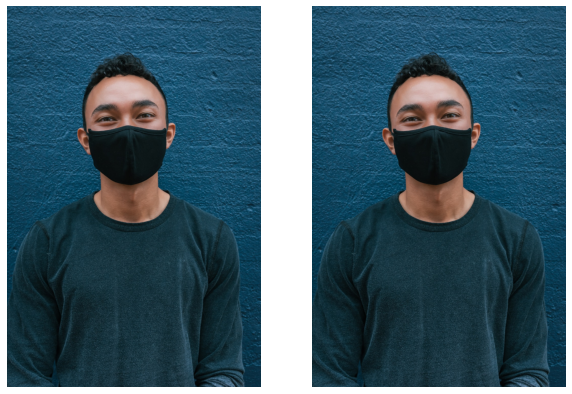

======================HOG====================


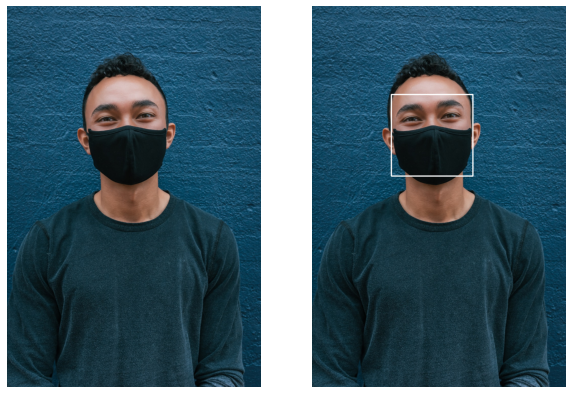

======================MTCNN====================


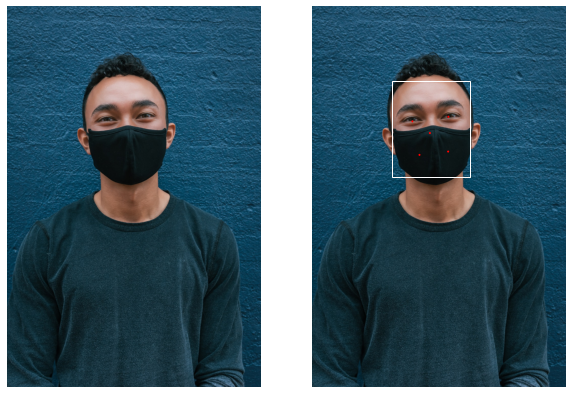

======================HaarCascade====================


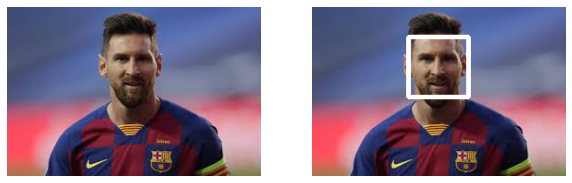

======================HOG====================


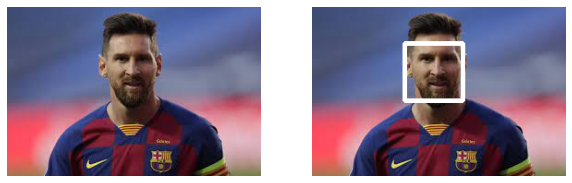

======================MTCNN====================


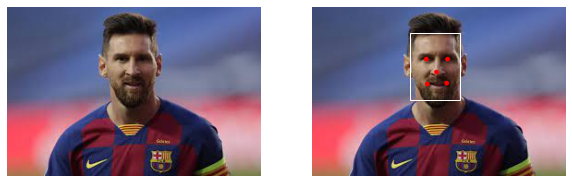

======================HaarCascade====================


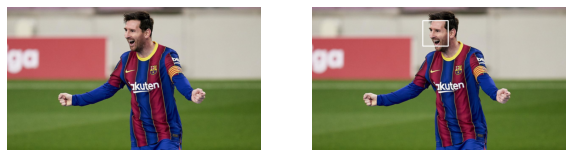

======================HOG====================


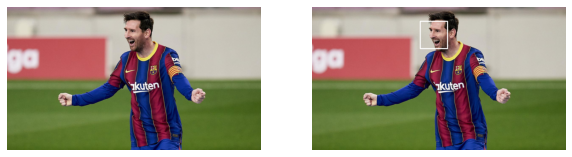

======================MTCNN====================


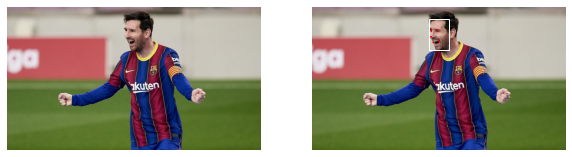

======================HaarCascade====================


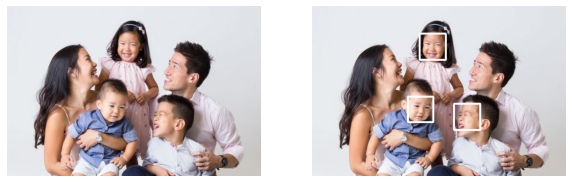

======================HOG====================


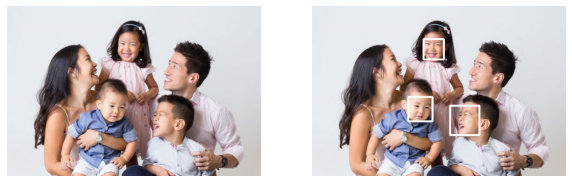

======================MTCNN====================


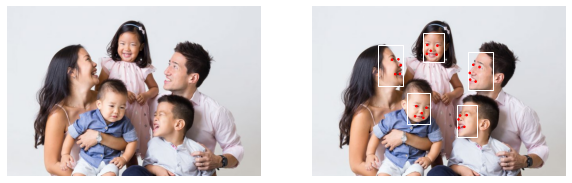

======================HaarCascade====================


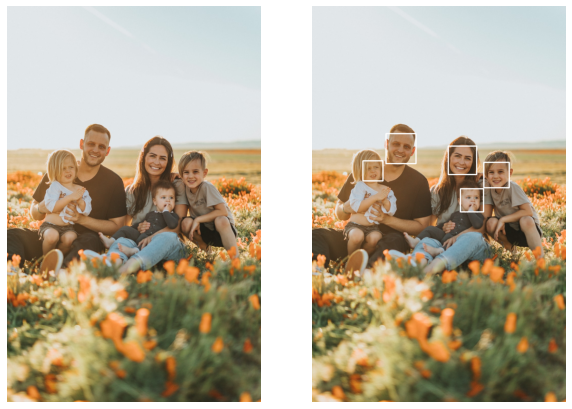

======================HOG====================


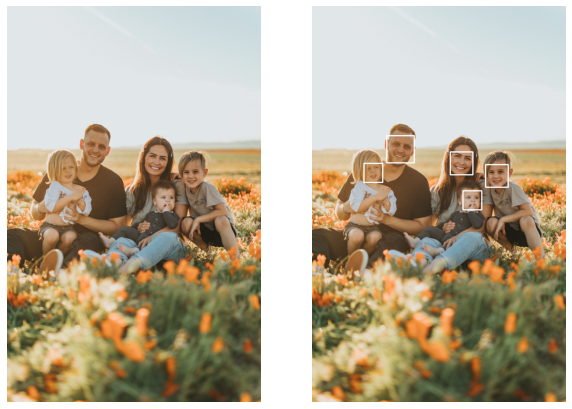

======================MTCNN====================


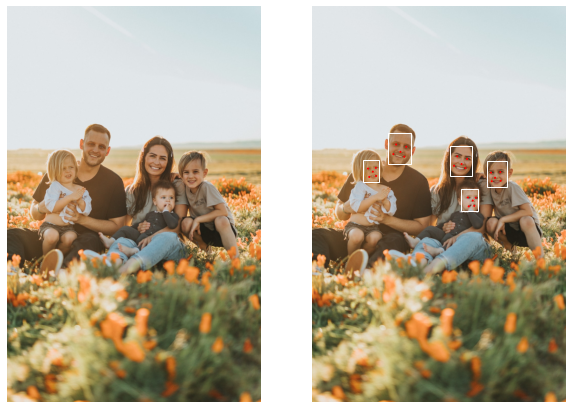

======================HaarCascade====================


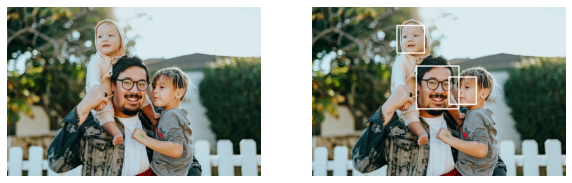

======================HOG====================


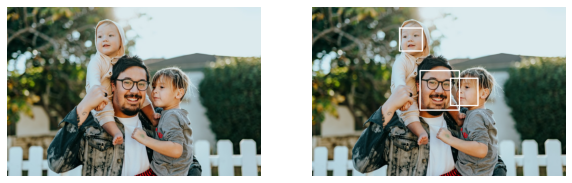

======================MTCNN====================


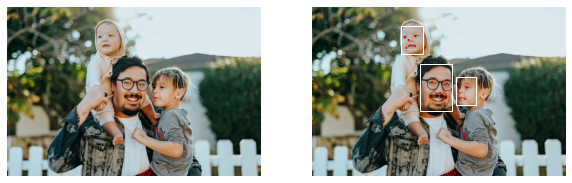

======================HaarCascade====================


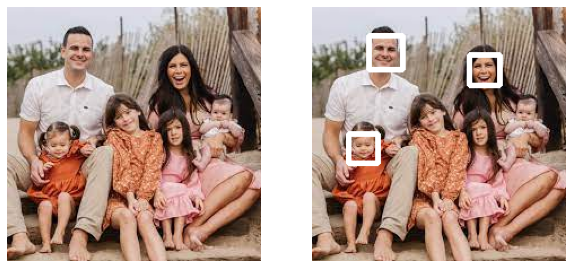

======================HOG====================


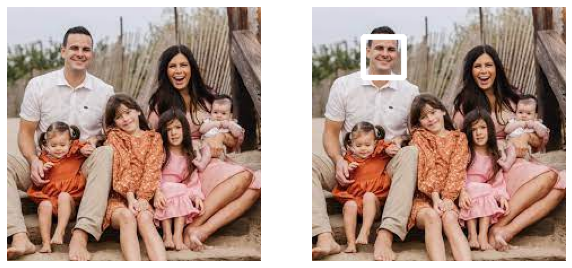

======================MTCNN====================


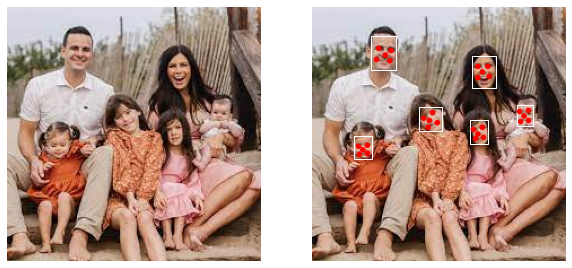

======================HaarCascade====================


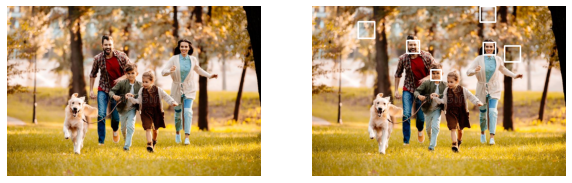

======================HOG====================


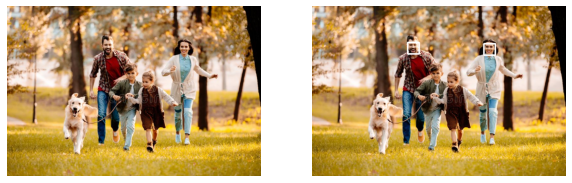

======================MTCNN====================


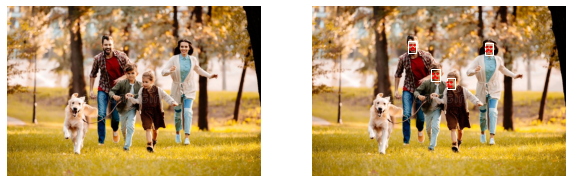

======================HaarCascade====================


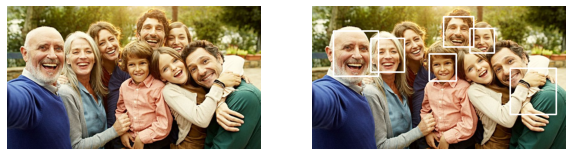

======================HOG====================


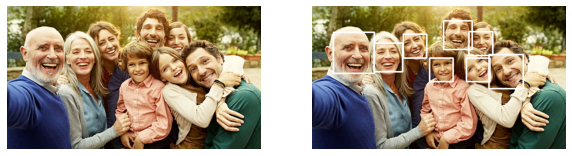

======================MTCNN====================


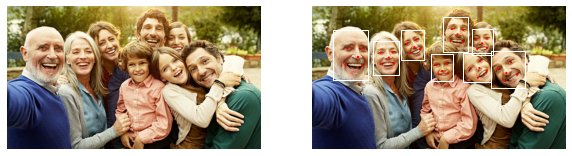

In [ ]:
TestImagesPath = '/content/test'
Images =list(paths.list_images(TestImagesPath))
for imagePath in Images:
    print("======================HaarCascade====================")
    HaarCascadeAlgorithm(imagePath)
    print("======================HOG====================")
    HOGAlgorithm(imagePath)
    # print("======================dlibCNN====================")
    # dlibCNNAlgorithm(imagePath)
    print("======================MTCNN====================")
    MTCNNAlgorithm(imagePath)

## **Image processing**

In [ ]:
# def Image_Pre_processing(image):
#     # img = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
#     # cl1= cv2.split(img)
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#     cl1 = clahe.apply(image)
#     # img = cv2.merge(cl1)
#     # bgr = cv2.cvtColor(img, cv2.COLOR_LAB2BGR) 
#     return  cl1 
    

def Histogram(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    lab_planes = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    lab_planes[0] = clahe.apply(lab_planes[0])
    lab = cv2.merge(lab_planes)
    bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return  bgr   

In [ ]:
path = '/content/gdrive/MyDrive/Dataset/'
result = "/content/result/"
d = pd.DataFrame(columns=['face', 'encoding'])
def RotationAndResize(faces,pixels,filename):
    data = pd.DataFrame(columns=['face', 'encoding'])
    id=0
    src = np.array([
       [  54.70657349,   73.85186005],
       [ 105.04542542,   73.57342529],
       [  80.03600311,  102.48085785],
       [  59.35614395,  131.95071411],
       [ 101.04272461,  131.72013855]], dtype=np.float32)
    landmarkList=[]
    for i in range(len(faces)):
        if faces[i]['confidence'] > 0.99:
            landmark = np.array([faces[i]['keypoints']['left_eye'],\
                         faces[i]['keypoints']['right_eye'],\
                         faces[i]['keypoints']['nose'],\
                         faces[i]['keypoints']['mouth_left'],\
                         faces[i]['keypoints']['mouth_right']])
            landmarkList.append(landmark)    
    for landmark in landmarkList:
        dst = landmark.astype(np.float32)
        tform = trans.SimilarityTransform()
        tform.estimate(dst, src)
        M = tform.params[0:2,:]
        wrapped = cv2.warpAffine(pixels,M,(160,160), borderValue = 0.0)
        wrapped = cv2.resize(wrapped, (160,160))
        wrapped =  Histogram(wrapped)
        resPath = result + str(filename) + "_" + str(id) + ".jpg"
        id +=1
        global d
        d=d.append({'face': resPath, 'encoding':wrapped }, ignore_index=True)
        data=data.append({'face': resPath, 'encoding':wrapped }, ignore_index=True)
        cv2.imwrite(resPath, cv2.cvtColor(wrapped, cv2.COLOR_RGB2BGR))   
        return data

## **Load data**

In [ ]:
from pathlib import Path
Path("/content/result").mkdir(parents=True, exist_ok=True)


In [ ]:
import time
 

imagesPath = '/content/Dataset3'
files =list(paths.list_images(imagesPath))
# d = pd.DataFrame(columns=['face', 'encoding'])
i=1
start=time.time()
print(start)
for file in files:
    print(file)
    print(i)
    i=i+1
    pixels = plt.imread(file,0)
    detector = MTCNN()
    faces = detector.detect_faces(pixels)
    filename = os.path.split(os.path.splitext(file)[0])[-1]
    RotationAndResize(faces,pixels,filename)
end=time.time()   
print(end)
print(end-start)

1630844675.294706
/content/Dataset3/Azadeh-Samadi3.jpeg
1
/content/Dataset3/amin-hayai2.jpeg
2
/content/Dataset3/saeid-marouf3.jpeg
3
/content/Dataset3/amin-hayai4.jpg
4
/content/Dataset3/Azadeh-Samadi4.jpg
5
/content/Dataset3/Anil_Kapoor3.jpg
6
/content/Dataset3/saeid-marouf4.jpg
7
/content/Dataset3/Hrithik_Roshan5.jpg
8
/content/Dataset3/Anil_Kapoor1.jpg
9
/content/Dataset3/Mohammad_Mousavi5.jpeg
10
/content/Dataset3/Hrithik_Roshan4.jpg
11
/content/Dataset3/Hrithik_Roshan1.jpg
12
/content/Dataset3/Hrithik_Roshan2.jpg
13
/content/Dataset3/Anil_Kapoor2.jpg
14
/content/Dataset3/Mohammad_Mousavi2.jpeg
15
/content/Dataset3/Hrithik_Roshan3.jpg
16
/content/Dataset3/amin-hayai5.jpg
17
/content/Dataset3/saeid-marouf5.jpeg
18
/content/Dataset3/saeid-marouf2.jpeg
19
/content/Dataset3/Azadeh-Samadi1.jpg
20
/content/Dataset3/Anil_Kapoor4.jpg
21
/content/Dataset3/amin-hayai3.jpg
22
/content/Dataset3/Mohammad_Mousavi4.jpg
23
/content/Dataset3/Mohammad_Mousavi1.jpg
24
/content/Dataset3/Azadeh-Samadi

## **Extract features**

In [ ]:
!pip install facenet_pytorch
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
# import face_recognition
from torchvision.transforms import ToTensor
# Load InceptionResnetV1 model
resnet = InceptionResnetV1(pretrained='vggface2').eval()
tf_img = lambda i: ToTensor()(i).unsqueeze(0)
embeddings = lambda input: resnet(input)

# add encoding to data frame
df = pd.DataFrame(columns=['faceloc','encoding', 'InceptionResnetV1encoding'])
with torch.no_grad():
    for index,row in tqdm(d.iterrows()):
       
        t = tf_img(row['encoding'])
        e = embeddings(t).squeeze().tolist()
        df=df.append({'faceloc' : row['face'], 'encoding':row['encoding'],'InceptionResnetV1encoding':e }, ignore_index=True)  
data = [d for d in df['InceptionResnetV1encoding']]

     |████████████████████████████████| 1.9 MB 41.0 MB/s 


  0%|          | 0.00/107M [00:00<?, ?B/s]

0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


## **Principal Component Analysis (PCA)** 

In [ ]:

def scatter_thumbnails(data, images, zoom=0.2, colors=None):
    assert len(data) == len(images)

    # reduce embedding dimentions to 2
    x = PCA(n_components=2).fit_transform(data) if len(data[0]) > 2 else data

    # create a scatter plot.
    f = plt.figure(figsize=(22, 15))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], s=4)
    _ = ax.axis('off')
    _ = ax.axis('tight')

    # add thumbnails :)
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox
    for i in range(len(images)):
        image = plt.imread(images[i])
        im = OffsetImage(image, zoom=zoom)
        bboxprops = dict(edgecolor=colors[i]) if colors is not None else None
        ab = AnnotationBbox(im, x[i], xycoords='data',frameon=(bboxprops is not None),pad=0.1,bboxprops=bboxprops)
        ax.add_artist(ab)
    return ax


def scatter_thumbnails2(x, images, zoom=0.2, colors=None):
    # assert len(data) == len(images)

    # pcn= PCA(n_components=50).fit_transform(data) if len(data[0]) > 2 else data
    # x= TSNE(perplexity=50,n_components=2).fit_transform(pcn)

    # create a scatter plot.
    f = plt.figure(figsize=(22, 15))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], s=4)
    _ = ax.axis('off')
    _ = ax.axis('tight')

    # add thumbnails :)
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox
    for i in range(len(images)):
        image = plt.imread(images[i])
        im = OffsetImage(image, zoom=zoom)
        bboxprops = dict(edgecolor=colors[i]) if colors is not None else None
        ab = AnnotationBbox(im, x[i], xycoords='data',frameon=(bboxprops is not None),pad=0.1,bboxprops=bboxprops)
        ax.add_artist(ab)
    return ax

def scatter(data, zoom=0.4, colors=None):
  

    # reduce embedding dimentions to 2
    x = PCA(n_components=2).fit_transform(data) if len(data[0]) > 2 else data

    # create a scatter plot.
    f = plt.figure(figsize=(22, 15))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], s=4)
    _ = ax.axis('off')
    _ = ax.axis('tight')
    return ax


def scatter2(x, zoom=0.4, colors=None):

    # reduce embedding dimentions to 2
    # pcn= PCA(n_components=50).fit_transform(data) if len(data[0]) > 2 else data
    # x= TSNE(perplexity=50,n_components=2).fit_transform(pcn)
    # create a scatter plot.
    f = plt.figure(figsize=(22, 15))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], s=4)
    _ = ax.axis('off')
    _ = ax.axis('tight')
    return ax

from sklearn.manifold import TSNE
def Tsne(encoding):
    # PCA first to speed it up
    pcn = PCA(n_components=5).fit_transform(encoding)
    tsne= TSNE(perplexity=5,n_components=2).fit_transform(pcn)
    return tsne

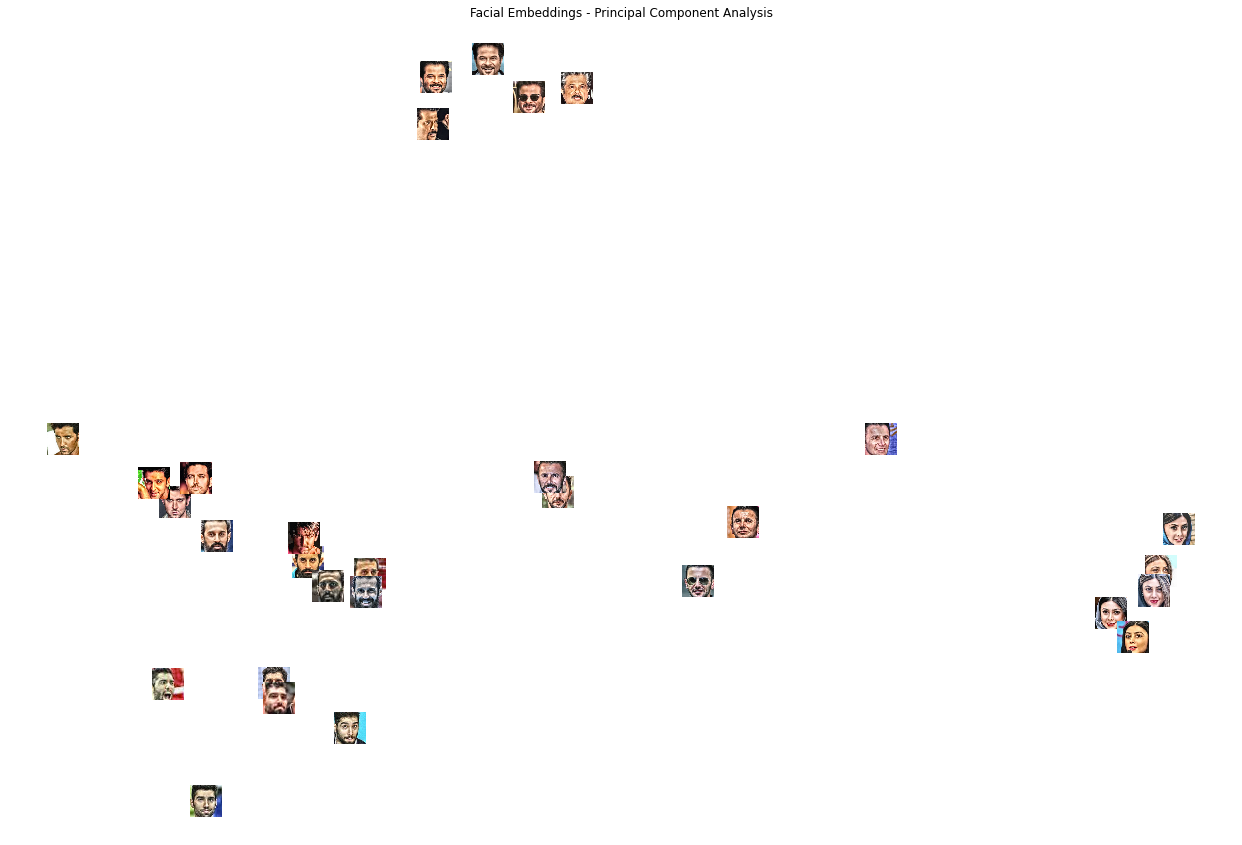

In [ ]:
_ = scatter_thumbnails(df.InceptionResnetV1encoding.tolist(), df.faceloc.tolist())
plt.title('Facial Embeddings - Principal Component Analysis')
plt.show()


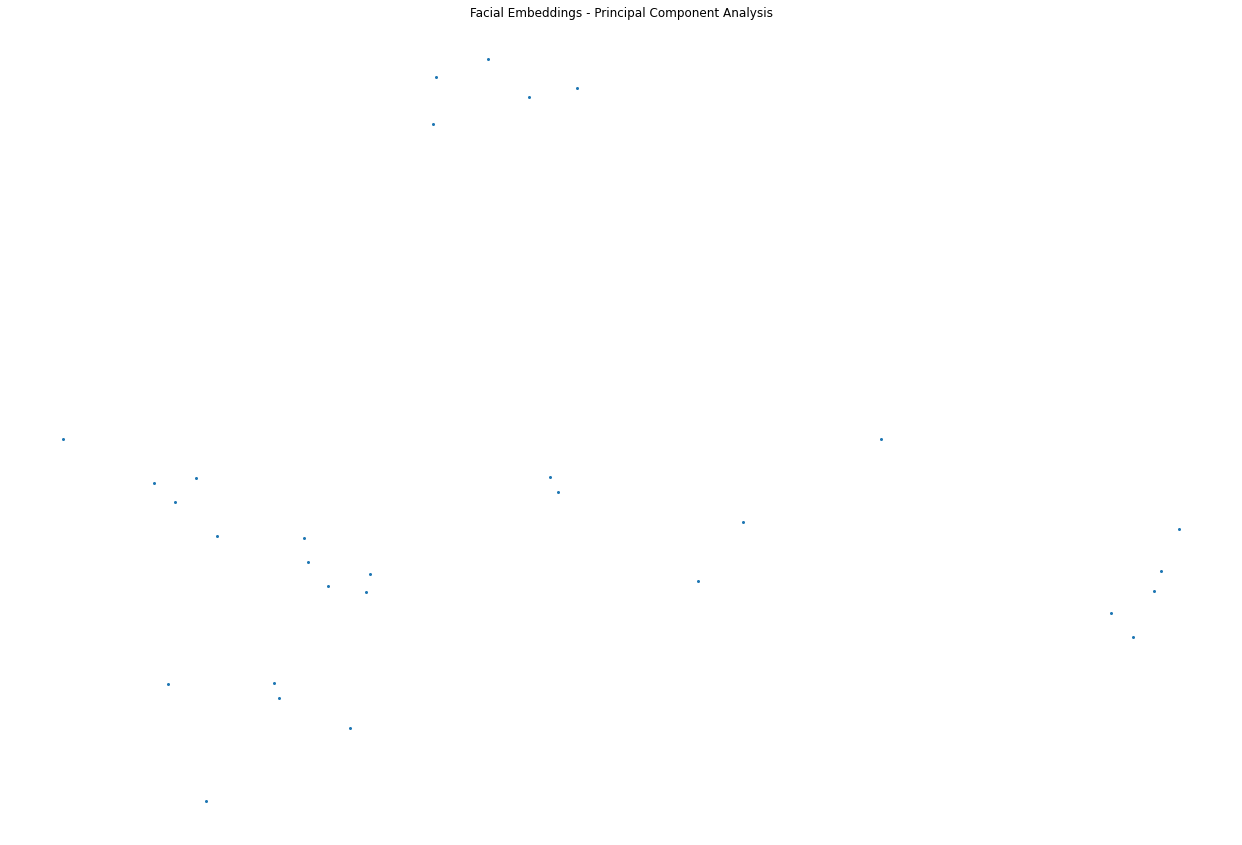

In [ ]:
_ = scatter(df.InceptionResnetV1encoding.tolist())
plt.title('Facial Embeddings - Principal Component Analysis')
plt.show()

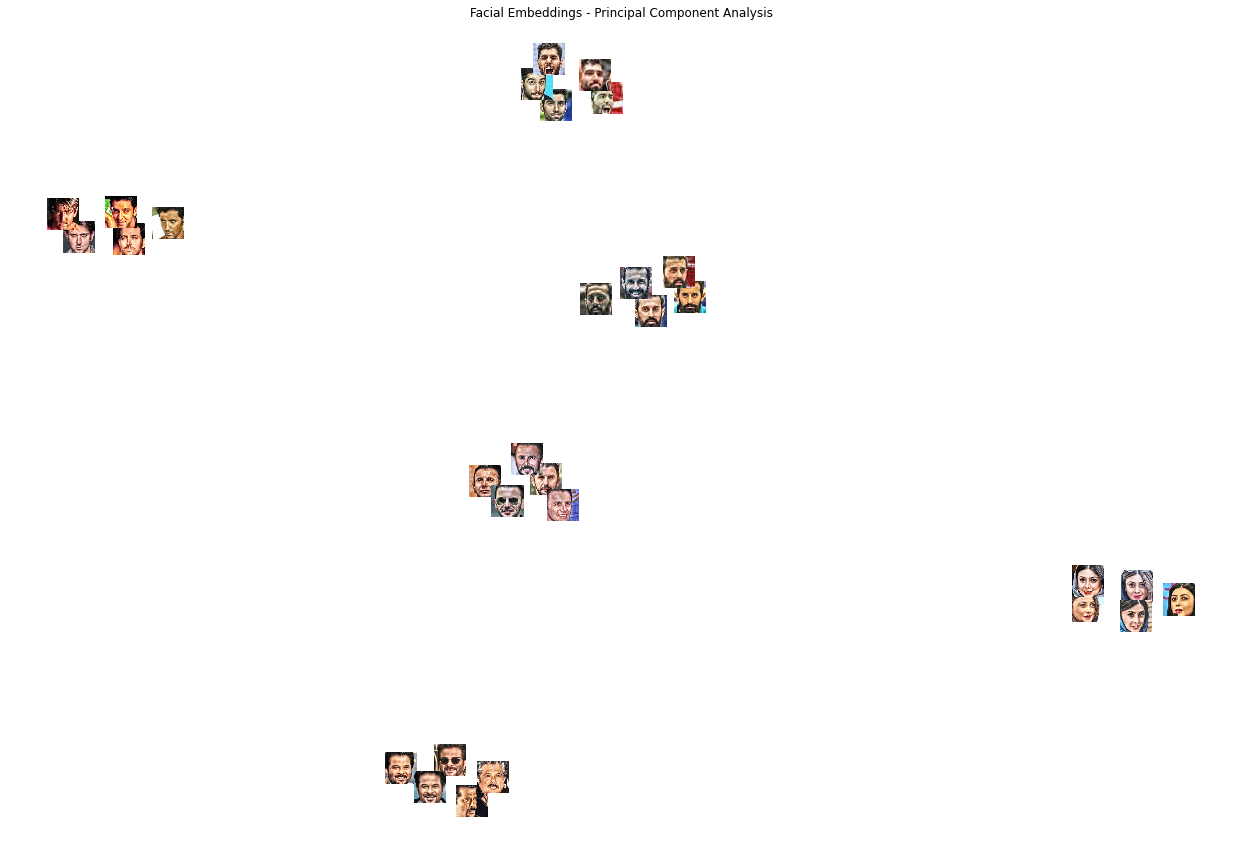

In [ ]:
tsne=Tsne(df.InceptionResnetV1encoding.tolist())
_ = scatter_thumbnails2(tsne, df.faceloc.tolist())
plt.title('Facial Embeddings - Principal Component Analysis')
plt.show()

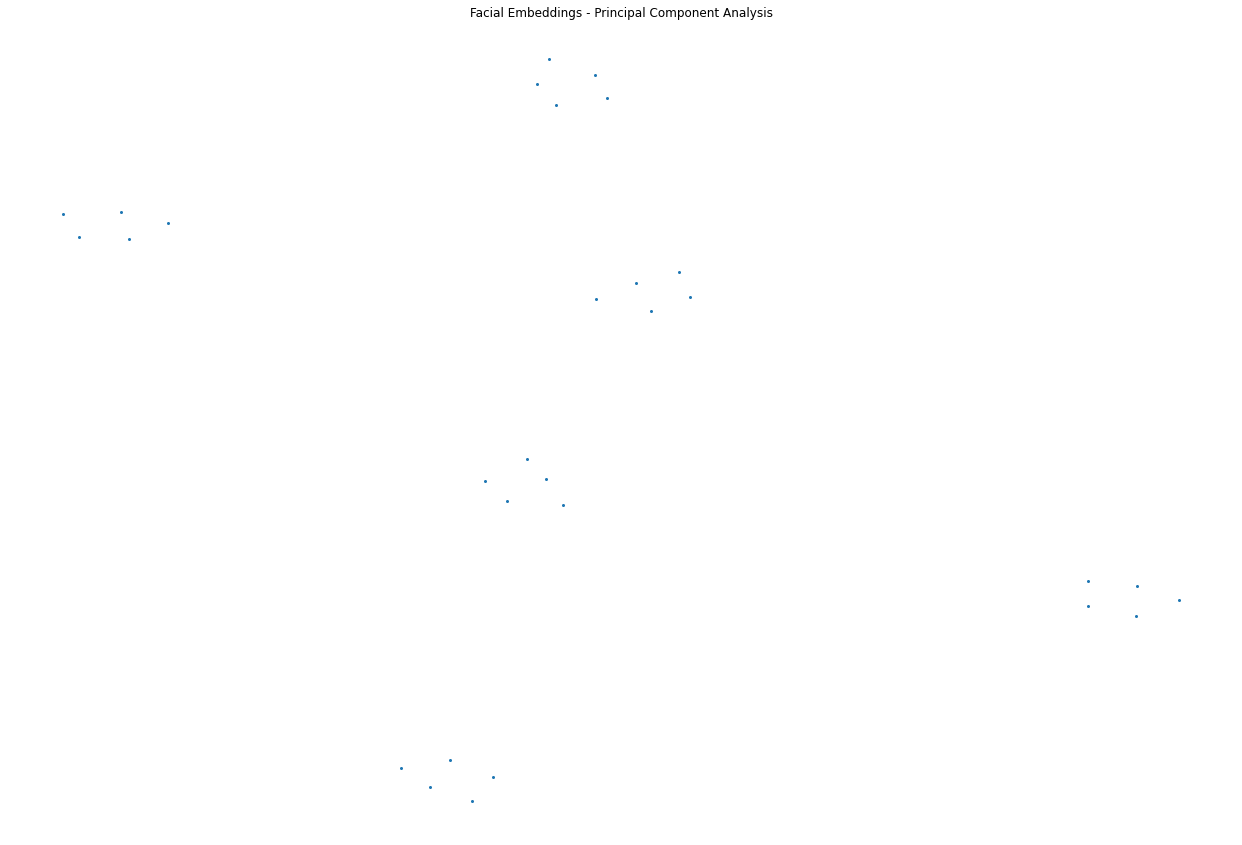

In [ ]:
# # t=Tsne(df.encoding.tolist())
# # pcn = PCA(n_components=50).fit_transform(df.encoding.tolist())
# # tsne= TSNE(perplexity=50,n_components=2).fit_transform(pcn)
# pcn= PCA(n_components=50).fit_transform(data) 
# tsne= TSNE(perplexity=50,n_components=2).fit_transform(pcn)
_ = scatter2(tsne)
plt.title('Facial Embeddings - Principal Component Analysis')
plt.show()

## **Clustering**

In [ ]:
from sklearn.metrics import silhouette_score
import pickle

In [ ]:
def ShowClusters(clusters,yhat):
  for cluster in clusters:
    print("======================================================")
    print("lable:")
    print(cluster)
    indexes = np.where(yhat == cluster)
    cluster = df.loc[indexes]
    print("size:")
    print(len(cluster.faceloc))
    print("======")
    for x in cluster.faceloc:
      print(x) 

# create scatter plot for samples from each cluster
def showScatterOfClustering(clusters,yhat):
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(tsne[row_ix, 0], tsne[row_ix, 1])
  # show the plot
  pyplot.show()


### KMeans

The Elbow Method showing the optimal k


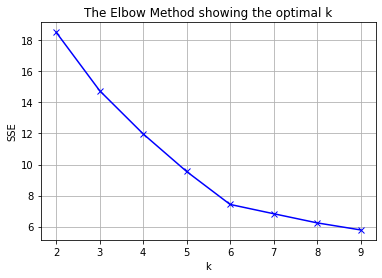

In [ ]:
from sklearn.cluster import KMeans
distortions = []
tmp_sil=[]
start, end = 2, 10
for i in range(start, end):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)
print("The Elbow Method showing the optimal k")
plt.plot(range(2, 10), distortions, 'bx-')
plt.xticks(range(2, 10))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()


find best number of cluster


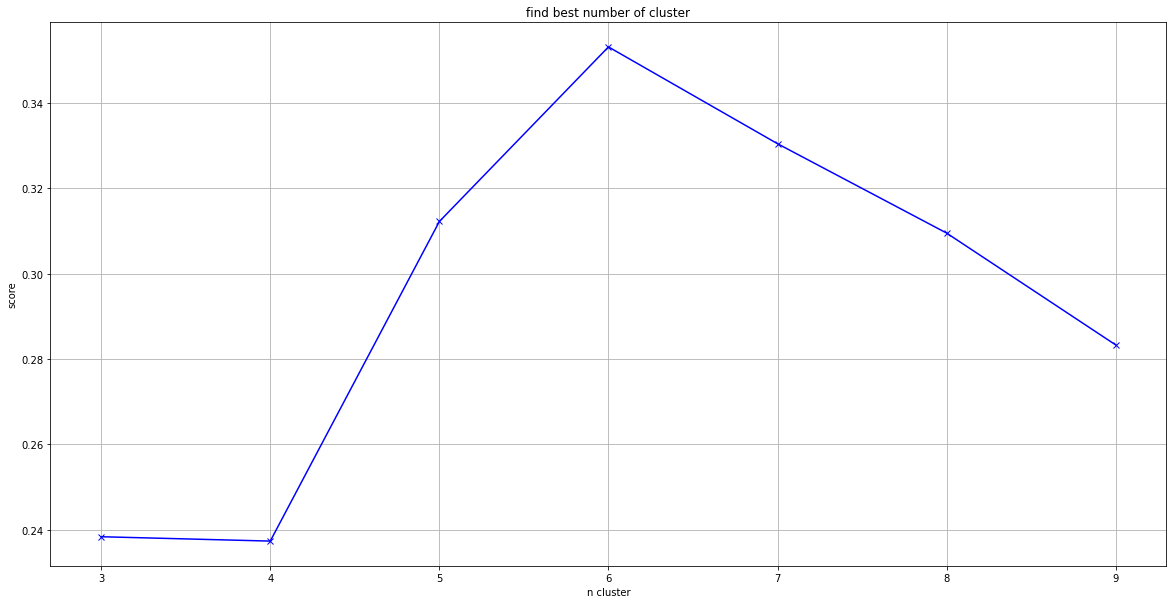

In [ ]:

# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
tmp_sil=[]
start, end = 3, 10
for i in range(start, end):
  # print(i)
# define the model
  model = KMeans(n_clusters=i)
  # fit the model
  model.fit(data)
  # assign a cluster to each example
  yhat = model.predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # df['Kmeans'] = yhat
  sil=silhouette_score(data,yhat)
  tmp_sil.append(sil)
  # print(f'Silhouette Score: {silhouette_score(tsne,yhat)}')


print("find best number of cluster")
plt.figure(figsize=(20, 10))
plt.plot(range(3, 10), tmp_sil, 'bx-')
plt.xticks(range(3,10))
plt.xlabel('n cluster')
plt.ylabel('score')
plt.title('find best number of cluster')
plt.grid()
plt.show()

In [ ]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define the model
model = KMeans(n_clusters=6)
# fit the model
model.fit(tsne)
# assign a cluster to each example
yhat = model.predict(tsne)
# retrieve unique clusters
clusters = unique(yhat)

print(f'Silhouette Score: {silhouette_score(tsne,yhat)}')
showScatterOfClustering(clusters,yhat)

In [ ]:
# define the model
Kmeans_model = KMeans(6)
# fit the model
Kmeans_model.fit(data)
# assign a cluster to each example
yhat = Kmeans_model.predict(data)
# retrieve unique clusters
clusters = unique(yhat)
df['kmeans'] = yhat
KmeanFilename = 'kmean.pkl'
# save model
pickle.dump(Kmeans_model, open(KmeanFilename, 'wb'))


In [ ]:
ShowClusters(clusters,yhat)

### **gaussian mixture clustering**

3
4
5
6
7
8
9
find best number of cluster


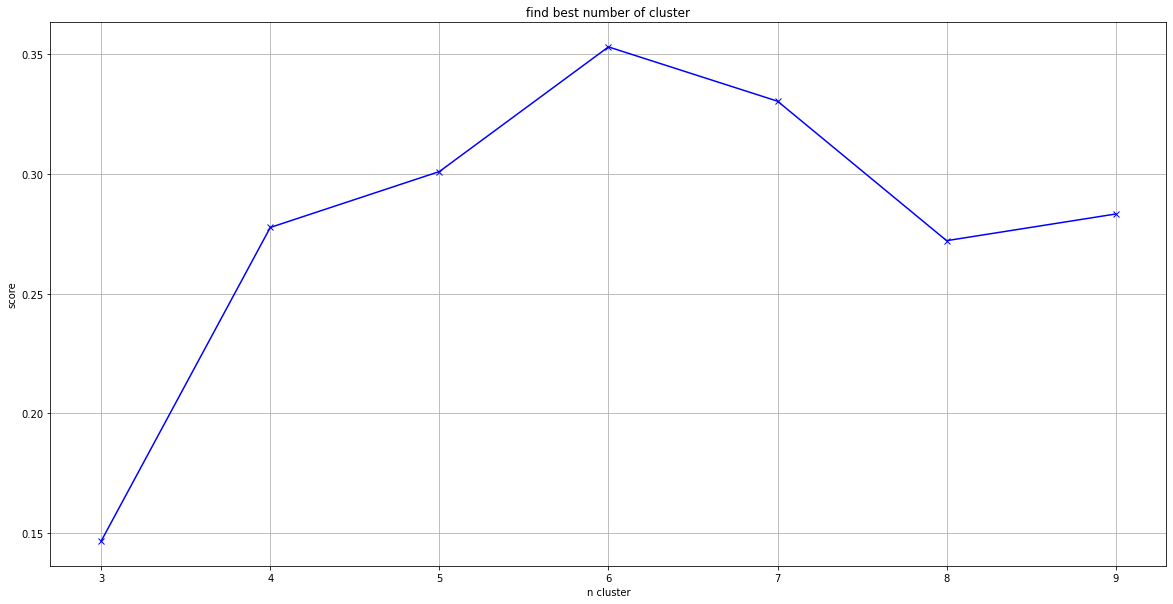

In [ ]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot

tmp_sil=[]
start, end = 3, 10
for i in range(start, end):
  print(i)
  # define the model
  model =GaussianMixture(i)
  # fit the model
  model.fit(data)
  # assign a cluster to each example
  yhat = model.predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  sil=silhouette_score(data,yhat)
  tmp_sil.append(sil)
  # print(f'Silhouette Score: {silhouette_score(tsne,yhat)}')


print("find best number of cluster")
plt.figure(figsize=(20, 10))
plt.plot(range(3, 10), tmp_sil, 'bx-')
plt.xticks(range(3,10))
plt.xlabel('n cluster')
plt.ylabel('score')
plt.title('find best number of cluster')
plt.grid()
plt.show()

In [ ]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot

# define the model
model = GaussianMixture(6)
# fit the model
model.fit(tsne)
# assign a cluster to each example
yhat = model.predict(tsne)
# retrieve unique clusters
clusters = unique(yhat)
print(f'Silhouette Score: {silhouette_score(tsne,yhat)}')
showScatterOfClustering(clusters,yhat)

In [ ]:
# define the model
gmm_model = KMeans(6)
# fit the model
gmm_model.fit(data)
# assign a cluster to each example
yhat = gmm_model.predict(data)
# retrieve unique clusters
clusters = unique(yhat)
df['gmm'] = yhat

gmFilename = 'gm.pkl'
# save model
pickle.dump(gmm_model, open(gmFilename, 'wb'))

In [ ]:
ShowClusters(clusters,yhat)

### **DBSCAN**

In [ ]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(tsne)
distances, indices = nbrs.kneighbors(tsne)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
print(distances)
plt.plot(distances)

In [ ]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

# define the model
model = DBSCAN(eps=6.98326241, min_samples=1)
# model = DBSCAN(eps=1.79, min_samples=3)
# fit model and predict clusters
yhat = model.fit_predict(tsne)
# retrieve unique clusters
clusters = unique(yhat)
print(clusters )
print(f'Silhouette Score: {silhouette_score(tsne,yhat)}')
# showScatterOfClustering(clusters,yhat)


In [ ]:
ShowClusters(clusters,yhat)

In [ ]:
df

## **predict**

In [ ]:

 
# load the model from disk
KMeansModel = pickle.load(open(KmeanFilename, 'rb'))



In [ ]:
from mtcnn.mtcnn import MTCNN

def encode_test(imagepath):
  data_test= pd.DataFrame(columns=['encoding'])
  faces,pixels=MTCNNAlgorithm(imagepath)
  data=RotationAndResize(faces,pixels,filename)
  for index,row in tqdm(data.iterrows()):
    t = tf_img(row['encoding'])
    e = embeddings(t).squeeze().tolist()
    data_test=data_test.append({'encoding':e}, ignore_index=True)
  return data_test


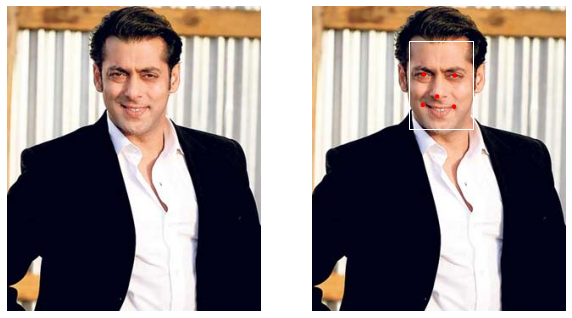

0it [00:00, ?it/s]

K-Means label: [2]


In [ ]:
from mtcnn.mtcnn import MTCNN
test_x =encode_test("/content/Salman_Khan140.jpg").encoding.tolist()
cluster_num=KMeansModel.predict(test_x)
print(f'K-Means label: {cluster_num}')


In [ ]:
df.loc[df['kmeans'] == 2].faceloc	

29      /content/result/Salman_Khan34_0.jpg
44      /content/result/Salman_Khan50_0.jpg
70      /content/result/Salman_Khan36_0.jpg
105     /content/result/Salman_Khan23_0.jpg
274      /content/result/Salman_Khan3_0.jpg
277     /content/result/Salman_Khan38_0.jpg
284     /content/result/Salman_Khan10_0.jpg
287     /content/result/Salman_Khan45_0.jpg
300     /content/result/Salman_Khan41_0.jpg
302     /content/result/Salman_Khan29_0.jpg
378     /content/result/Salman_Khan43_0.jpg
406     /content/result/Salman_Khan39_0.jpg
430     /content/result/Salman_Khan28_0.jpg
472     /content/result/Salman_Khan30_0.jpg
486      /content/result/Salman_Khan2_0.jpg
509     /content/result/Salman_Khan20_0.jpg
519      /content/result/Aamir_Khan38_0.jpg
601     /content/result/Salman_Khan13_0.jpg
638      /content/result/Aamir_Khan41_0.jpg
731     /content/result/Salman_Khan14_0.jpg
768      /content/result/Salman_Khan9_0.jpg
784     /content/result/Salman_Khan25_0.jpg
796     /content/result/Salman_K

In [ ]:
# define parent class
class Parent:        
   parentAttr = 100
   def __init__(self):
      print " parent constructor"

   def parentMethod(self):
      print ' parent method'
# define child class
class Child(Parent):
   def __init__(self):
      print "child constructor"

   def childMethod(self):
      print 'child method'


In [ ]:
# Python program showing
# abstract base class work
 
from abc import ABC, abstractmethod
class Animal(ABC):
    def move(self):
        pass
 
class Snake(Animal):
    def move(self):
        print("I can crawl")

class Dog(Animal):
    def move(self):
        print("I can bark")
 

K = Snake()
K.move()
 
R = Dog()
R.move()
 


I can crawl
I can bark


In [ ]:

x = int(input())

while x != 0:
    for i in range(1,x):
        print(x)
    x = int(input())

3
3
3
2
2
0
